=== Default AdaBoost Model (10 estimators) ===
Accuracy: 0.8182
Confusion Matrix:
[[6782  632]
 [1144 1211]]

=== Best AdaBoost Model ===
Best Accuracy: 0.8340
Best Number of Estimators: 73
Confusion Matrix:
[[7015  399]
 [1223 1132]]


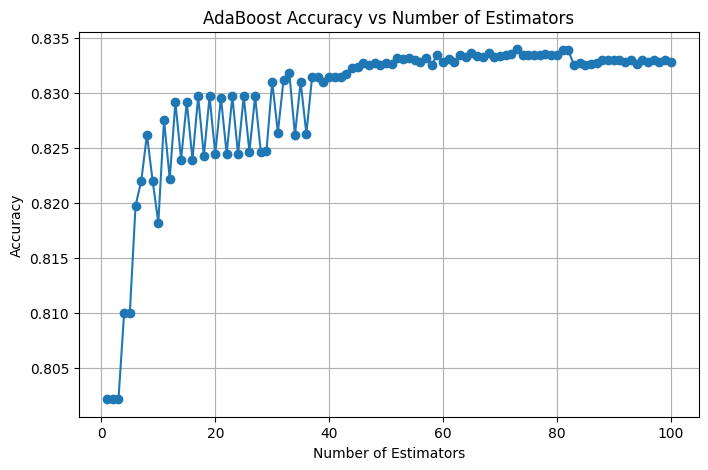

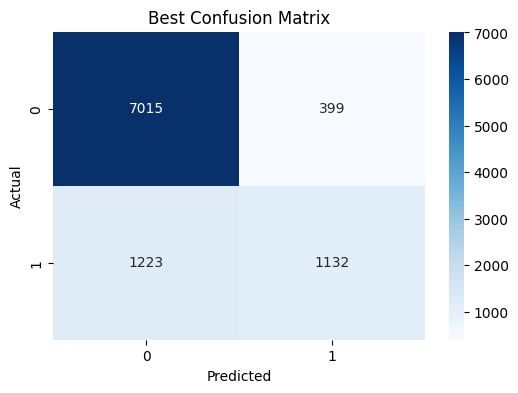

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("income.csv")

# Feature and target split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Handle categorical variables (if any)
X = pd.get_dummies(X)
y = pd.factorize(y)[0]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------
# 1. Default AdaBoost model (10 estimators)
# ------------------------
clf_default = AdaBoostClassifier(n_estimators=10, random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)
default_cm = confusion_matrix(y_test, y_pred_default)

print("=== Default AdaBoost Model (10 estimators) ===")
print(f"Accuracy: {default_accuracy:.4f}")
print("Confusion Matrix:")
print(default_cm)

# ------------------------
# 2. Fine-tune n_estimators
# ------------------------
best_score = 0
best_n = 0
best_cm = None
scores = []

for n in range(1, 101):
    clf = AdaBoostClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

    if score > best_score:
        best_score = score
        best_n = n
        best_cm = confusion_matrix(y_test, y_pred)

print("\n=== Best AdaBoost Model ===")
print(f"Best Accuracy: {best_score:.4f}")
print(f"Best Number of Estimators: {best_n}")
print("Confusion Matrix:")
print(best_cm)

# Plot accuracy vs number of estimators
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), scores, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.grid(True)
plt.show()

# Plot best confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(best_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Best Confusion Matrix")
plt.show()
